In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [3]:
df = pd.read_csv("/kaggle/input/hotel-bookings/hotel_bookings.csv")


In [4]:
df.shape


(119390, 32)

In [5]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum().sort_values(ascending=False)


company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [8]:
df.duplicated().sum()


np.int64(31994)

In [9]:
# Fill missing children and babies as 0
df['children'] = df['children'].fillna(0)
df['babies'] = df['babies'].fillna(0)

# Fill missing country
df['country'] = df['country'].fillna('Unknown')

# Remove invalid ADR values
df = df[df['adr'] > 0]


In [10]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']


In [11]:
df_nc = df[df['is_canceled'] == 0]


In [12]:
top_countries = df_nc['country'].value_counts().head(10)
top_countries


country
PRT    19708
GBR     9604
FRA     8428
ESP     6313
DEU     6028
IRL     2537
ITA     2417
BEL     1862
NLD     1713
USA     1586
Name: count, dtype: int64

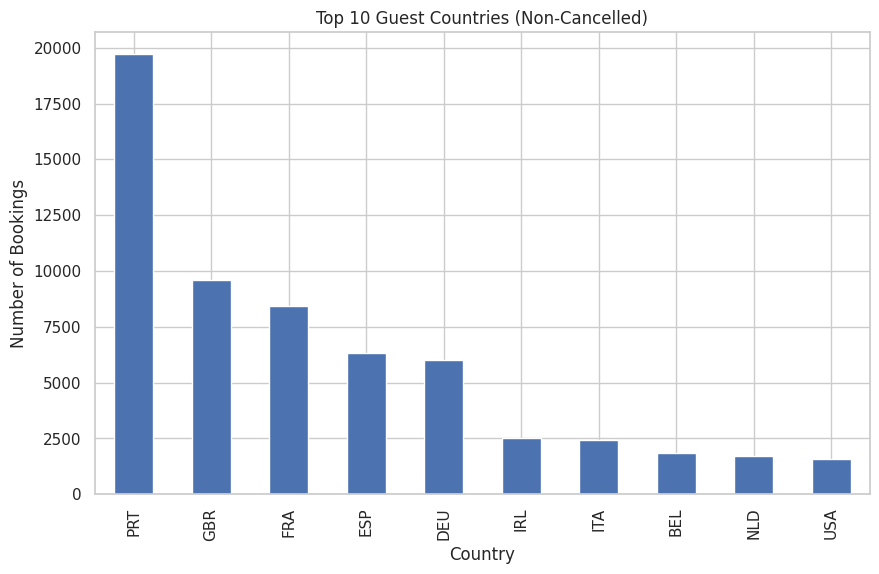

In [13]:
top_countries.plot(kind='bar')
plt.title("Top 10 Guest Countries (Non-Cancelled)")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.show()


In [14]:
country_df = df_nc['country'].value_counts().reset_index()
country_df.columns = ['country', 'bookings']

fig = px.choropleth(
    country_df,
    locations='country',
    color='bookings',
    title='Guest Origins by Country',
    color_continuous_scale='Plasma'
)
fig.show()


In [15]:
df_nc.groupby('hotel')['adr'].mean()


hotel
City Hotel      108.273133
Resort Hotel     92.934475
Name: adr, dtype: float64

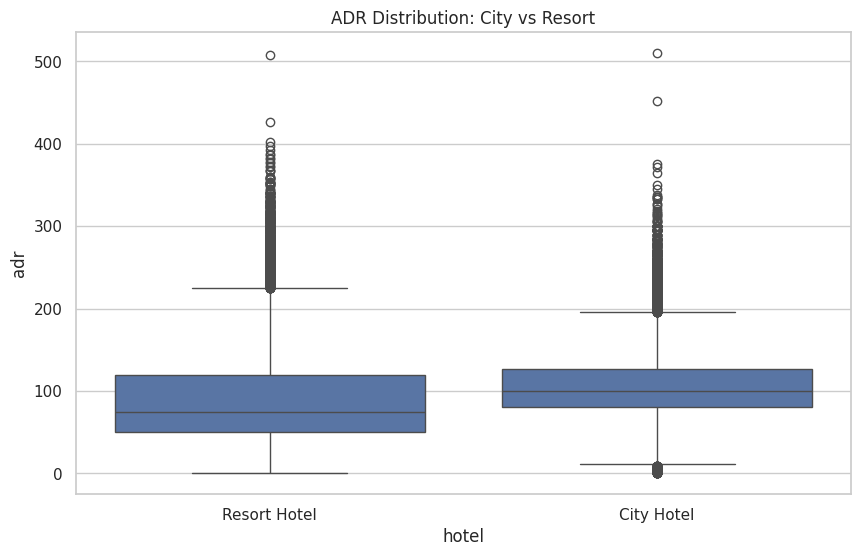

In [16]:
sns.boxplot(data=df_nc, x='hotel', y='adr')
plt.title("ADR Distribution: City vs Resort")
plt.show()


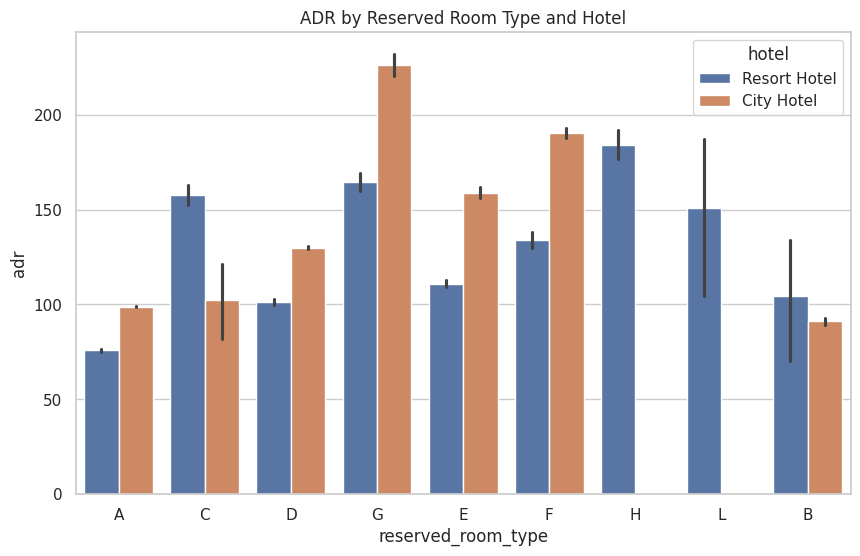

In [17]:
sns.barplot(
    data=df_nc,
    x='reserved_room_type',
    y='adr',
    hue='hotel'
)
plt.title("ADR by Reserved Room Type and Hotel")
plt.show()


In [20]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df_nc['arrival_date_month'] = pd.Categorical(
    df_nc['arrival_date_month'],
    categories=month_order,
    ordered=True
)


/tmp/ipykernel_55/679825085.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_55/3897065177.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



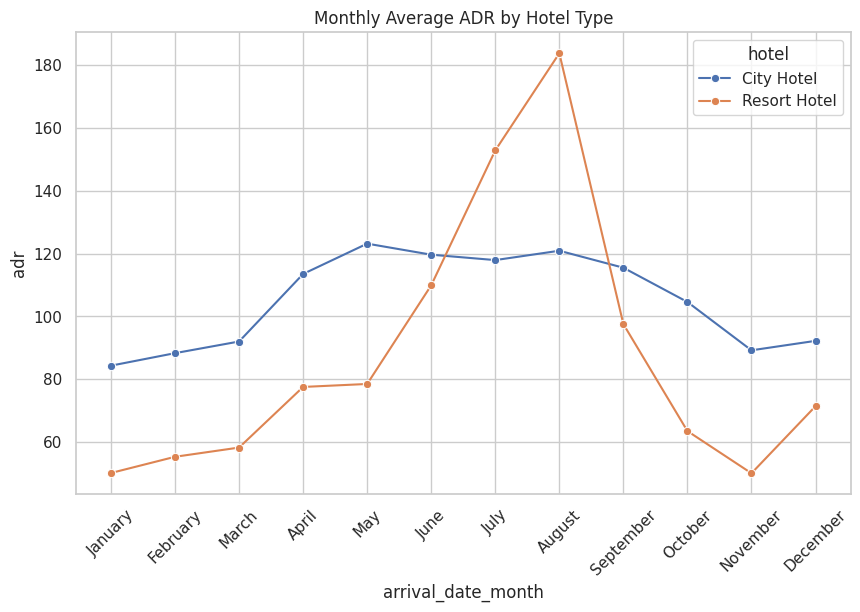

In [19]:
monthly_adr = df_nc.groupby(
    ['arrival_date_month','hotel']
)['adr'].mean().reset_index()

sns.lineplot(
    data=monthly_adr,
    x='arrival_date_month',
    y='adr',
    hue='hotel',
    marker='o'
)
plt.xticks(rotation=45)
plt.title("Monthly Average ADR by Hotel Type")
plt.show()


In [21]:
meal_counts = df_nc.groupby(['hotel','meal']).size().reset_index(name='count')
meal_counts


,hotel,meal,count
0,City Hotel,BB,34789
1,City Hotel,FB,2
2,City Hotel,HB,3876
3,City Hotel,SC,6482
4,Resort Hotel,BB,21675
5,Resort Hotel,FB,303
6,Resort Hotel,HB,5421
7,Resort Hotel,SC,24
8,Resort Hotel,Undefined,847


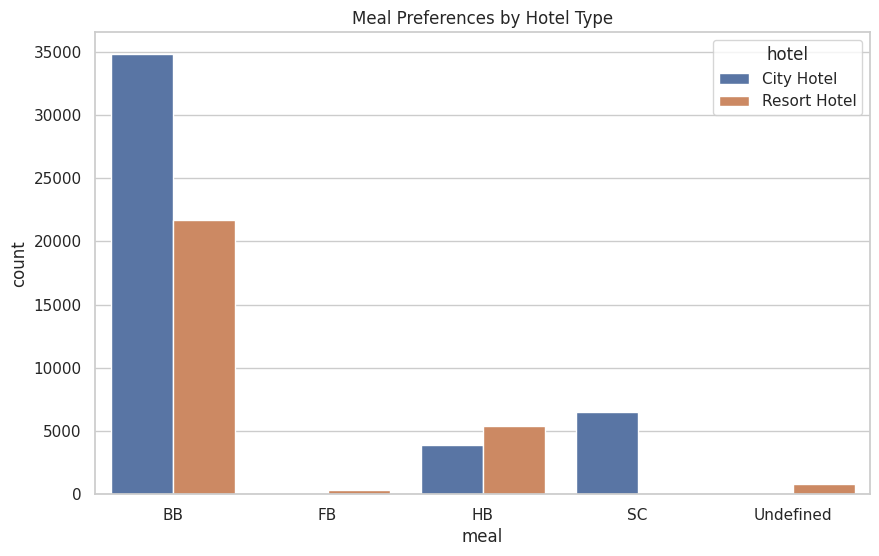

In [22]:
sns.barplot(
    data=meal_counts,
    x='meal',
    y='count',
    hue='hotel'
)
plt.title("Meal Preferences by Hotel Type")
plt.show()


In [23]:
request_cancel = pd.pivot_table(
    df,
    index='total_of_special_requests',
    columns='is_canceled',
    values='hotel',
    aggfunc='count',
    fill_value=0
)

request_cancel.columns = ['Not Cancelled', 'Cancelled']
request_cancel


,Not Cancelled,Cancelled
total_of_special_requests,,
0,35736,33404
1,25448,7279
2,9914,2849
3,1994,442
4,289,35
5,38,2


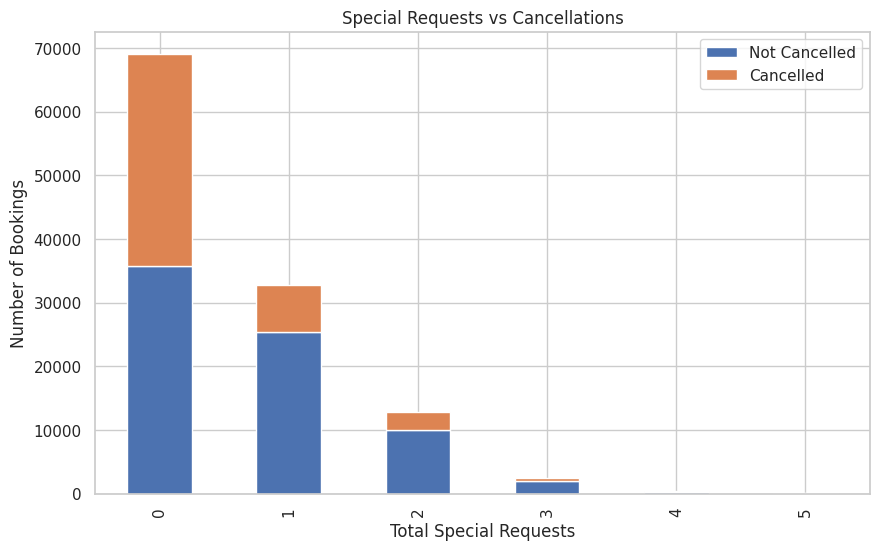

In [24]:
request_cancel.plot(kind='bar', stacked=True)
plt.title("Special Requests vs Cancellations")
plt.xlabel("Total Special Requests")
plt.ylabel("Number of Bookings")
plt.show()


/tmp/ipykernel_55/2173039311.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



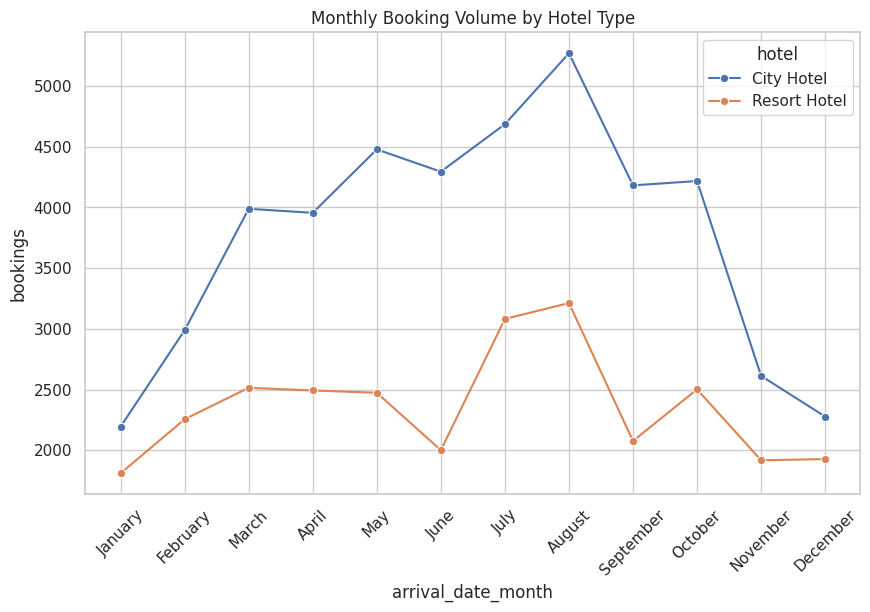

In [25]:
monthly_volume = df_nc.groupby(
    ['arrival_date_month','hotel']
).size().reset_index(name='bookings')

sns.lineplot(
    data=monthly_volume,
    x='arrival_date_month',
    y='bookings',
    hue='hotel',
    marker='o'
)
plt.xticks(rotation=45)
plt.title("Monthly Booking Volume by Hotel Type")
plt.show()


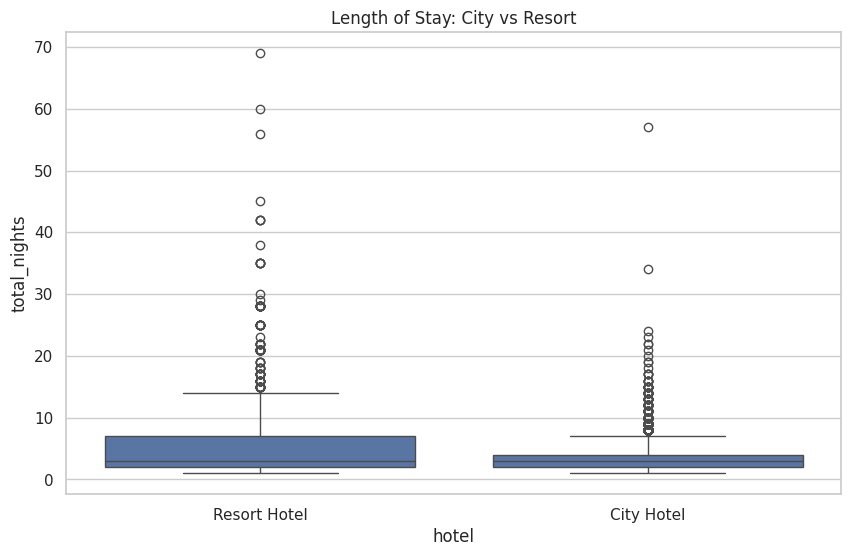

In [26]:
sns.boxplot(
    data=df_nc,
    x='hotel',
    y='total_nights'
)
plt.title("Length of Stay: City vs Resort")
plt.show()


In [27]:
segment_counts = df_nc['market_segment'].value_counts()
segment_counts


market_segment
Online TA        35391
Offline TA/TO    15616
Direct           10463
Groups            7485
Corporate         4226
Aviation           180
Complementary       58
Name: count, dtype: int64

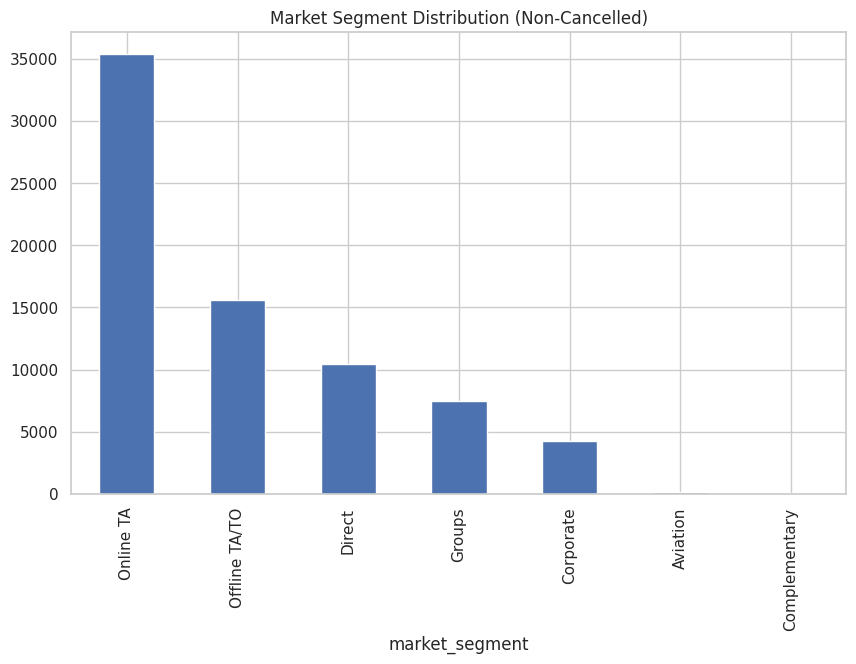

In [28]:
segment_counts.plot(kind='bar')
plt.title("Market Segment Distribution (Non-Cancelled)")
plt.show()


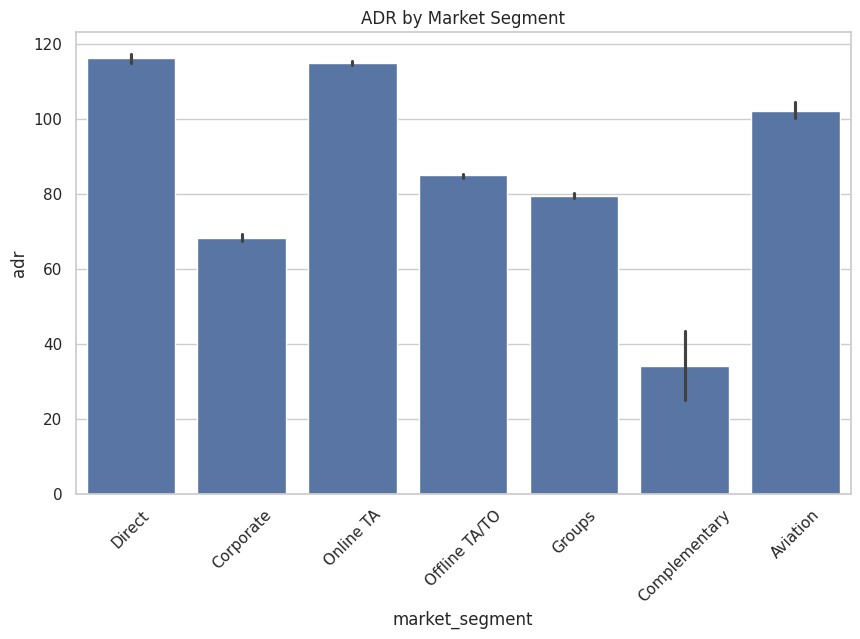

In [29]:
sns.barplot(
    data=df_nc,
    x='market_segment',
    y='adr'
)
plt.xticks(rotation=45)
plt.title("ADR by Market Segment")
plt.show()


In [30]:
df['is_canceled'].value_counts(normalize=True) * 100


is_canceled
0    62.521502
1    37.478498
Name: proportion, dtype: float64

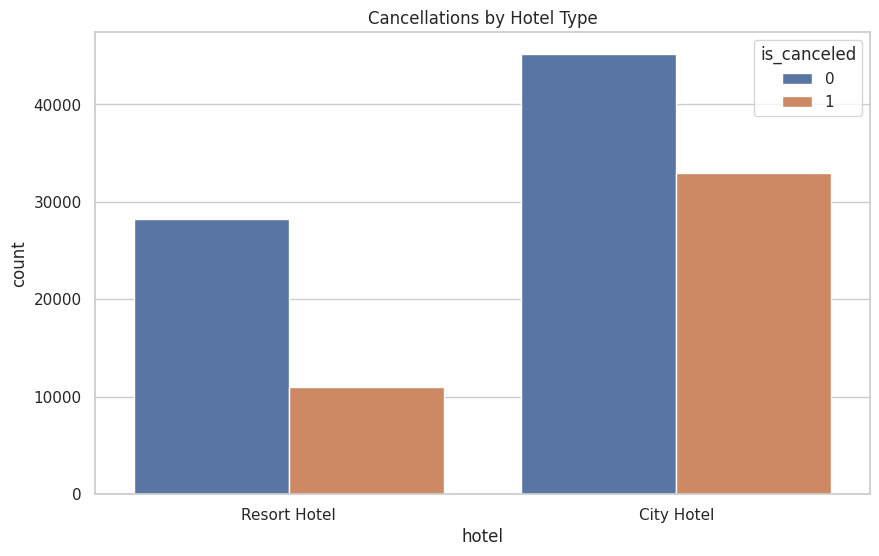

In [31]:
sns.countplot(
    data=df,
    x='hotel',
    hue='is_canceled'
)
plt.title("Cancellations by Hotel Type")
plt.show()


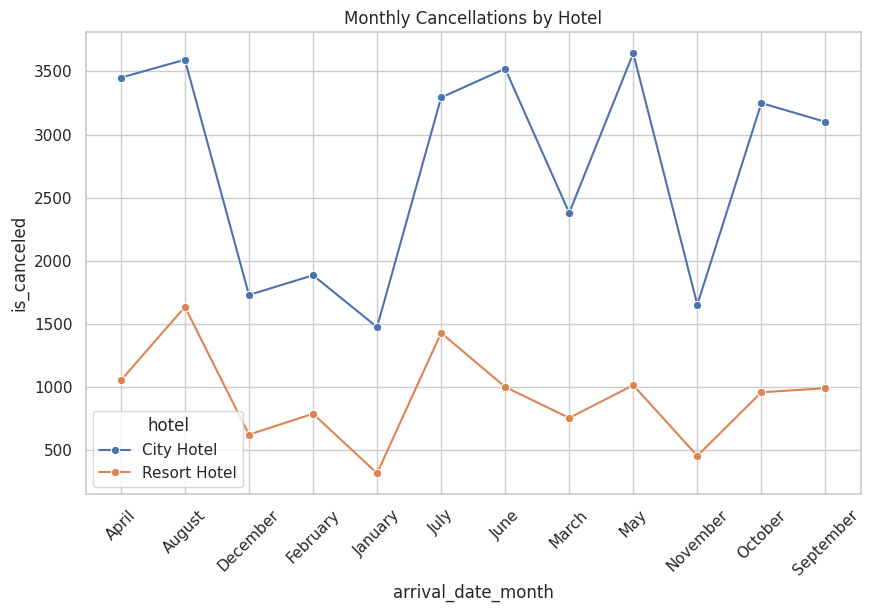

In [32]:
cancel_month = df.groupby(
    ['arrival_date_month','hotel']
)['is_canceled'].sum().reset_index()

sns.lineplot(
    data=cancel_month,
    x='arrival_date_month',
    y='is_canceled',
    hue='hotel',
    marker='o'
)
plt.xticks(rotation=45)
plt.title("Monthly Cancellations by Hotel")
plt.show()


In [33]:
room_mismatch = df_nc[
    df_nc['reserved_room_type'] != df_nc['assigned_room_type']
]

room_mismatch.groupby('hotel').size()


hotel
City Hotel      6383
Resort Hotel    6956
dtype: int64

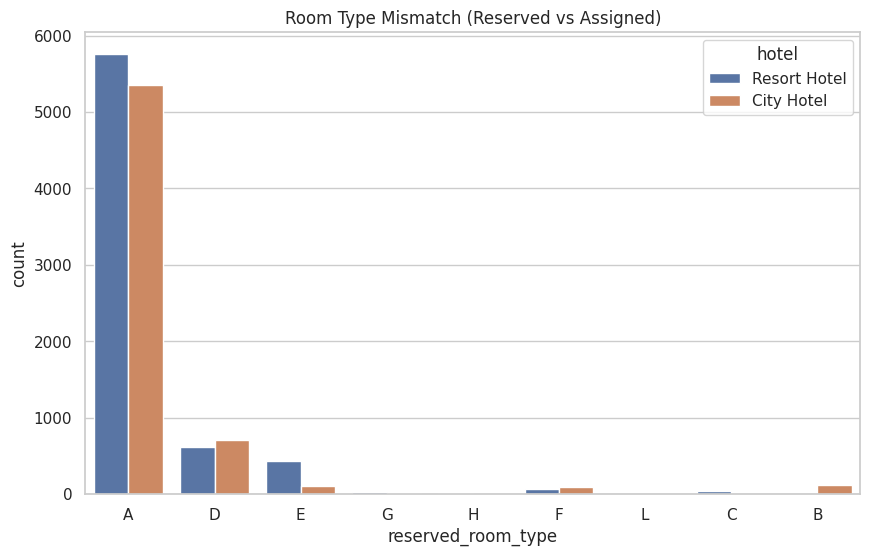

In [34]:
sns.countplot(
    data=room_mismatch,
    x='reserved_room_type',
    hue='hotel'
)
plt.title("Room Type Mismatch (Reserved vs Assigned)")
plt.show()


In [35]:
df_nc.groupby(['hotel','arrival_date_month']) \
     .size() \
     .reset_index(name='bookings') \
     .sort_values(['hotel','bookings'], ascending=[True, False]) \
     .groupby('hotel') \
     .head(3)


/tmp/ipykernel_55/1179990418.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,hotel,arrival_date_month,bookings
7,City Hotel,August,5270
6,City Hotel,July,4686
4,City Hotel,May,4478
19,Resort Hotel,August,3213
18,Resort Hotel,July,3082
14,Resort Hotel,March,2515


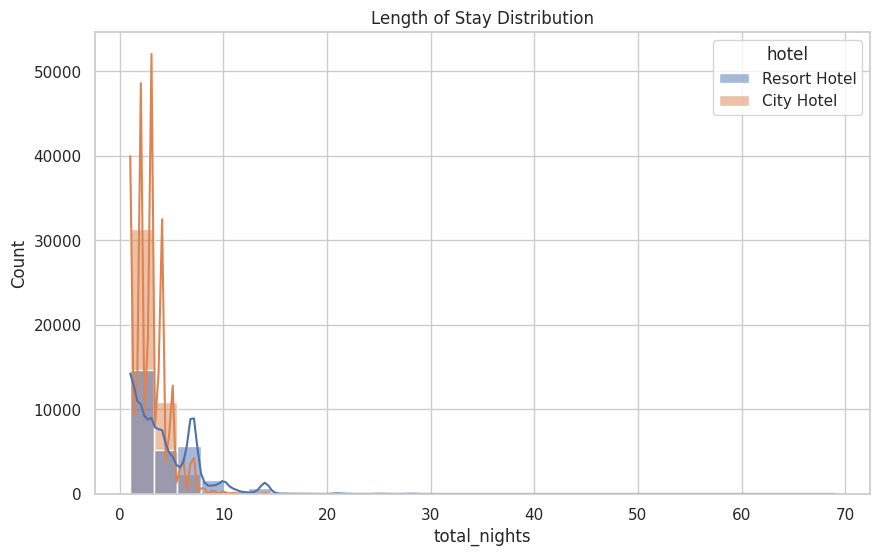

In [36]:
sns.histplot(
    data=df_nc,
    x='total_nights',
    hue='hotel',
    bins=30,
    kde=True
)
plt.title("Length of Stay Distribution")
plt.show()


In [37]:
segment_cancel = df.groupby('market_segment')['is_canceled'].mean() * 100
segment_cancel.sort_values(ascending=False)


market_segment
Undefined        100.000000
Groups            61.729216
Online TA         36.925682
Offline TA/TO     34.625529
Aviation          22.077922
Corporate         18.933436
Direct            15.388970
Complementary      7.936508
Name: is_canceled, dtype: float64

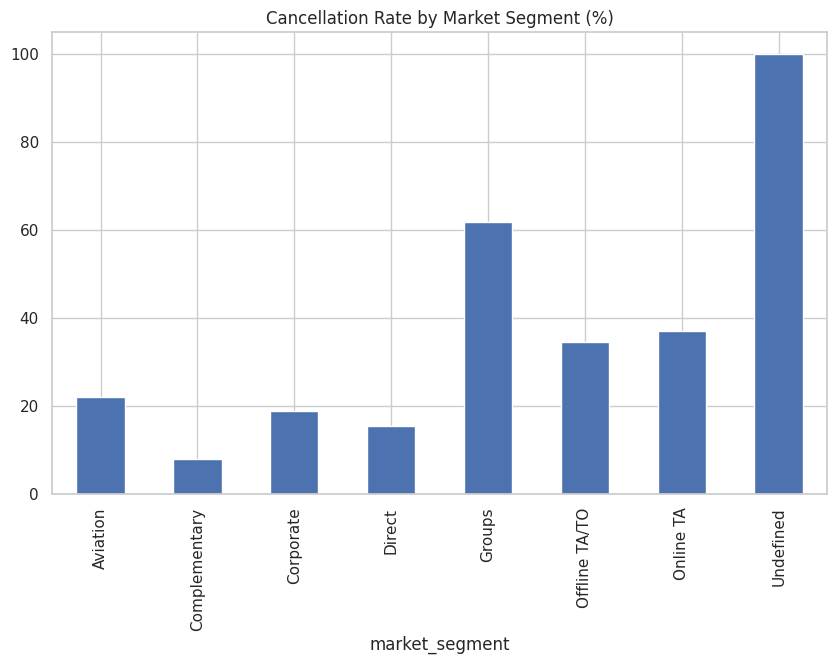

In [38]:
segment_cancel.plot(kind='bar')
plt.title("Cancellation Rate by Market Segment (%)")
plt.show()


In [39]:
df.groupby(['hotel','arrival_date_month'])['is_canceled'] \
  .sum() \
  .reset_index(name='cancellations') \
  .sort_values('cancellations', ascending=False) \
  .head(10)


,hotel,arrival_date_month,cancellations
8,City Hotel,May,3643
1,City Hotel,August,3592
6,City Hotel,June,3521
0,City Hotel,April,3450
5,City Hotel,July,3293
10,City Hotel,October,3249
11,City Hotel,September,3100
7,City Hotel,March,2380
3,City Hotel,February,1886
2,City Hotel,December,1730


In [40]:
guest_comp = df_nc[['adults','children','babies']].sum()
guest_comp


adults      135045.0
children      7572.0
babies         757.0
dtype: float64

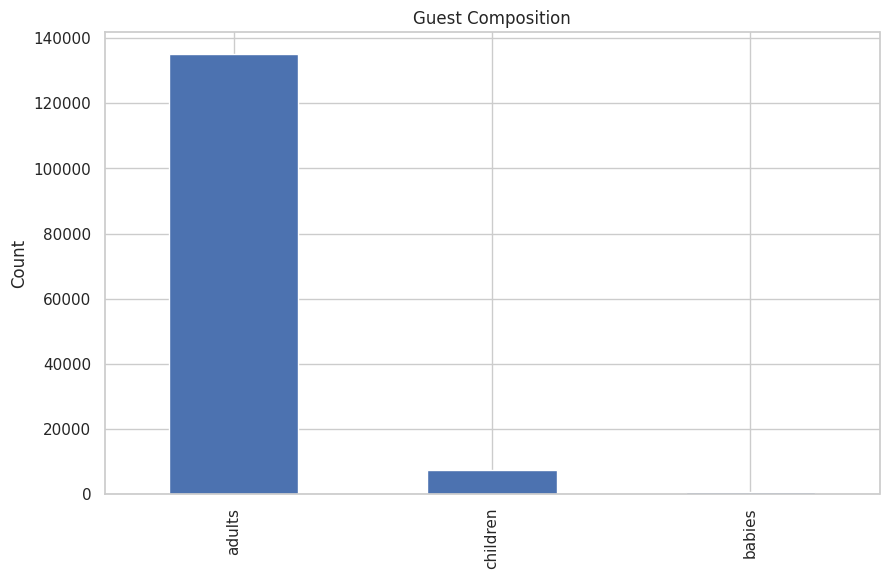

In [41]:
guest_comp.plot(kind='bar')
plt.title("Guest Composition")
plt.ylabel("Count")
plt.show()
